# AI Saturdays Training Exercise - Bank Classifier
Las campañas de marketing del banco dependen de los datos de los clientes. El tamaño de estos datos es tan grande que es imposible que un analista de datos extraiga buena información que pueda ayudar en el proceso de toma de decisiones.

Los modelos de aprendizaje automático están ayudando completamente en el desempeño de estas campañas. 

## Dataset

Este conjunto de datos está relacionado con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder a si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

El objetivo es predecir si el cliente se suscribirá (sí/no) a un depósito a plazo, construyendo un modelo de clasificación utilizando árboles de decisión.

## Summay of data
### Categorical Variables :
job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student

marital : married, single, divorced

education: secondary, tertiary, primary, unknown

default : yes, no

housing : yes, no

loan : yes, no

deposit : yes, no (Dependent Variable)

contact : unknown, cellular, telephone

month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

poutcome: unknown, other, failure, success


### Numerical Variables:
age

balance

day

duration

campaign -> numero de veces que se le ha contactado en esta campaña

pdays -> dias que han pasado desde el último contacto, -1 si no se le ha contactado

previous -> numero de veces que se le ha contactado previas a la campaña

In [25]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [26]:
# Crear dataframe a partir de .csv
df = pd.read_csv('bank.csv')

# Mostrar número de filas y columnas del dataframe
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

# Mostrar las primeras 10 filas (TO-DO)
df.head(10)


Filas: 11162 Cols: 17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [27]:
# Hallar número de valores únicos en cada columna (TO-DO)
for col in df:
  print(len(df[col].unique()))

76
12
3
4
2
3805
2
2
3
31
12
1428
36
472
34
4
2


In [28]:
# Comprobar la existencia de valores nulos en el dataset (TO-DO)
import pandas as pd
df = pd.read_csv('bank.csv')
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [29]:
# Mostrar información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [30]:
# Descripción analítica básica del dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<AxesSubplot:>

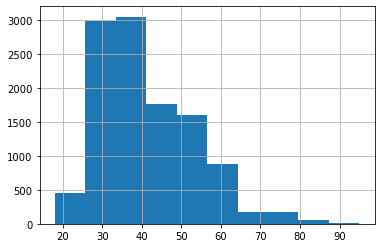

In [31]:
# Distribución de la Edad
df['age'].hist()

### Convertir datos categóricos si hay y hacer una copia de los datos


In [32]:
# Hacer una copia primero!!

bank_data = df.copy()



bank_data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


#### Job

In [33]:
# Explorar Personas que hicieron un depósito Vs Categoría de trabajo
jobscondeposito = bank_data[bank_data.deposit=='yes'].groupby("job", sort=False).size()

jobscondeposito.sort_index(ascending=False)

jobscondeposito

job
admin.            631
technician        840
services          369
management       1301
retired           516
blue-collar       708
unemployed        202
entrepreneur      123
housemaid         109
unknown            34
self-employed     187
student           269
dtype: int64

In [34]:
# pasamos "yes","no" a "1", "0"
bank_data['deposit'] = bank_data.deposit.map(dict(yes=1, no=0))
grouped = bank_data.groupby('job')
grouped['deposit'].sum()

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: deposit, dtype: int64

In [35]:
# Imprime los diferentes tipos de categorías de trabajo y cuántos elementos hay en cada uno (investiga value_counts)
bank_data.job.value_counts()


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [36]:
# Combinar trabajos similares en categorías. Para ello investigad la función replace
# ['management', 'admin.'] ->  'white-collar'
bank_data['job'] = bank_data['job'].replace(dict.fromkeys(['management','admin.'], 'white-collar'))
bank_data['job'] = bank_data['job'].replace(dict.fromkeys(['services', 'housemaid'], 'pink-collar'))
bank_data['job'] = bank_data['job'].replace(dict.fromkeys(['retired', 'student', 'unemployed', 'unknown'], 'other'))
bank_data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,white-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [37]:
# Volved a hacer el conteo de valores para ver como ha quedado la información
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

#### poutcome

In [38]:
# Exploremos los valores que tiene
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [39]:
# Combina "unknown" y "other" ya que "other" no es realmente compatible con el "success" o el "failure". Reutiliza la función replace
bank_data['poutcome'] = bank_data['poutcome'].replace(['other','unknown'],"unknown")
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

#### contact

In [40]:
# Drop 'contact' ya que no nos aporta información
bank_data.drop('contact', axis=1, inplace=True)



#### default

In [41]:
# Valores de "default" : Cambiar a  yes/no

bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
print(bank_data.isnull().values.any())


no     10994
yes      168
Name: default_cat, dtype: int64

#### housing, loan, deposit

Ahora repetid lo mismo con estas variables!


In [42]:
# values for "housing" : yes/no

def yes_no_to_one_zero(columns=[]):
    if columns:
        for column in columns:
            column_name = column + '_cat'
            bank_data[column_name] = bank_data[column].map( {'yes':1, 'no':0} )
            bank_data.drop(column, axis=1,inplace = True)

yes_no_to_one_zero(columns=['housing', 'loan'])
bank_data.head(10)


,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,1,no
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,1,no
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,0,unknown,1,no
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,-1,0,unknown,1,no
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,-1,0,unknown,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,20,apr,257,1,-1,0,unknown,0,no
11158,39,pink-collar,married,secondary,733,no,no,16,jun,83,4,-1,0,unknown,0,no
11159,32,technician,single,secondary,29,no,no,19,aug,156,2,-1,0,unknown,0,no
11160,43,technician,married,secondary,0,no,yes,8,may,9,2,172,5,failure,0,no


In [46]:
bank_data.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [47]:
# pdays: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior
# -1 significa que el cliente no fue contactado previamente

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [48]:
# sustituye el valor -1 de pdays por un valor grande i.e. 10000 para que refleje que hace mucho que no se le ha contactado (similar a no haberse contatado nunca)
#bank_data["pdays"]=bank_data["pdays"].replace(-1,10000)
#bank_data["pdays"]
bank_data.pdays = np.where(bank_data.pdays < 0, 10000, bank_data.pdays)
bank_data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,10000,0,unknown,1,no
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,10000,0,unknown,1,no
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,10000,0,unknown,1,no
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,10000,0,unknown,1,no
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,10000,0,unknown,1,no


In [49]:
print(bank_data['pdays'].value_counts())
print(bank_data.isnull().values.any())

10000    8324
92        106
182        89
91         84
181        81
         ... 
437         1
728         1
518         1
828         1
118         1
Name: pdays, Length: 472, dtype: int64
False


In [50]:
# Cread una nueva columna que contenga recent_pdays, queriendo que reefleje aquellos que son recientes como los valores mas grandes y los que nunca se les ha contactado
# los valores más pequeños (siempre positivos). Para esto, haced el inverso del valor de pdays. Una vez hecho, eliminad pdays
# Create a new column: recent_pdays 

bank_data['recent_pdays'] = 1 / bank_data['pdays']
bank_data




,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,recent_pdays
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,10000,0,unknown,1,no,0.000100
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,10000,0,unknown,1,no,0.000100
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,10000,0,unknown,1,no,0.000100
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,10000,0,unknown,1,no,0.000100
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,10000,0,unknown,1,no,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,20,apr,257,1,10000,0,unknown,0,no,0.000100
11158,39,pink-collar,married,secondary,733,no,no,16,jun,83,4,10000,0,unknown,0,no,0.000100
11159,32,technician,single,secondary,29,no,no,19,aug,156,2,10000,0,unknown,0,no,0.000100
11160,43,technician,married,secondary,0,no,yes,8,may,9,2,172,5,failure,0,no,0.005814


In [51]:
bank_data = bank_data.drop(['pdays'], axis=1)

In [52]:
bank_data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit,default_cat,recent_pdays
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,0,unknown,1,no,0.0001
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,0,unknown,1,no,0.0001
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,0,unknown,1,no,0.0001
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,0,unknown,1,no,0.0001
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,0,unknown,1,no,0.0001


### Convert to dummy values

In [53]:
# Convertid las variables a dummies: Es decir, para que sea tratable como vectores, es decir, números, requerimos cambiar las variables categóricas a numéricas.
# Para ello, lo que se hace es, para cada variable categórica, sustituirla por tantas variables como  valores tenga la columna, que contengan 1 si esa fila tenia ese valor y 0 si no
# investiga get_dummies

bank_with_dummies = pd.get_dummies(bank_data)

In [54]:
bank_with_dummies.shape



(11162, 43)

In [55]:
bank_with_dummies.describe()


,age,balance,day,duration,campaign,previous,deposit,recent_pdays,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown,default_cat_no,default_cat_yes
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,0.832557,0.473840,0.003124,0.174162,0.029385,...,0.024727,0.253001,0.084483,0.035119,0.028579,0.110016,0.095951,0.794033,0.984949,0.015051
std,11.913369,3225.413326,8.420740,347.128386,2.722077,2.292007,0.499338,0.030686,0.379266,0.168892,...,0.155298,0.434751,0.278123,0.184089,0.166628,0.312924,0.294537,0.404424,0.121761,0.121761
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,1.000000,1.000000,0.001919,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


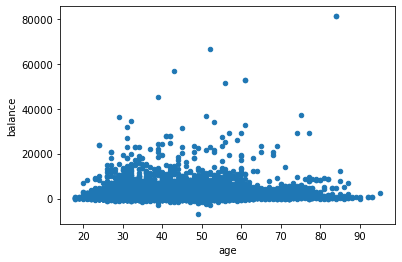

In [56]:
# Scatterplot con la edad y el dinero que hay en la cuenta (balance). Puedes hacerlo con pandas y su función plot o con scatterplot de seaborn
bank_with_dummies.plot.scatter(x = 'age', y = 'balance');

# ¿Qué interpretas?

# La mayoria tienen menos de 20000 en su cuenta bancaria

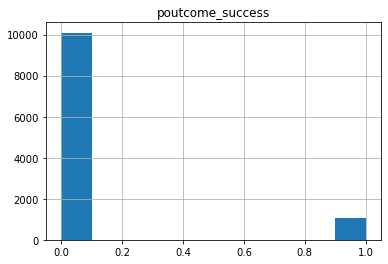

In [57]:
# Histograma con la variable poutcome_success
bank_with_dummies.hist('poutcome_success');




In [59]:
# Personas que se inscriben en un depósito a plazo
bank_with_dummies[bank_data.deposit == 1].describe()

,age,balance,day,duration,campaign,previous,deposit,recent_pdays,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,poutcome_unknown,default_cat_no,default_cat_yes
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,1.170354,1.0,0.004238,0.133863,0.023256,...,0.046890,0.174891,0.076196,0.061070,0.050860,0.116846,0.184912,0.698242,0.990168,0.009832
std,13.497781,3501.104777,8.501875,392.525262,1.921826,2.553272,0.0,0.035686,0.340537,0.150729,...,0.211423,0.379910,0.265336,0.239482,0.219733,0.321267,0.388263,0.459064,0.098676,0.098676
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,0.000000,1.0,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,0.000000,1.0,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,0.000000,1.0,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,1.000000,1.0,0.005128,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,58.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


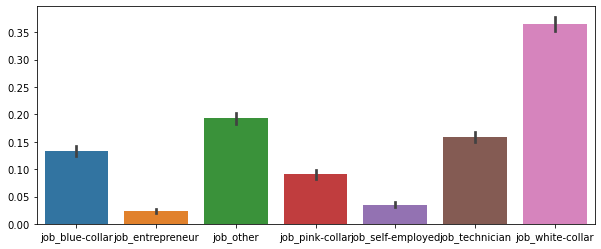

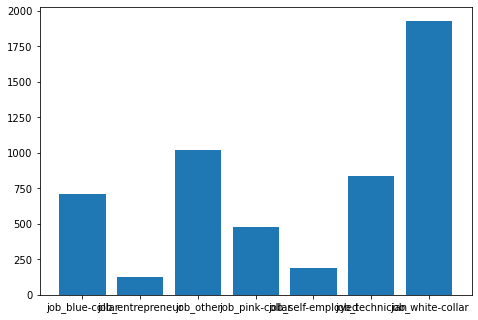

In [61]:
# Diagrama de barras mostrando el valor de desposite separado por trabajo. Investigad barplot de seaborn
plt.figure(figsize = (10,4))
filter_df=bank_with_dummies[bank_with_dummies.deposit==1].filter(regex='^job',axis=1)
sns.barplot( data=filter_df)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
jobsNames = filter_df.sum().index.values
countValues = filter_df.sum().tolist()
ax.bar(jobsNames,countValues)
plt.show()

### Establecer las relaciones entre las features


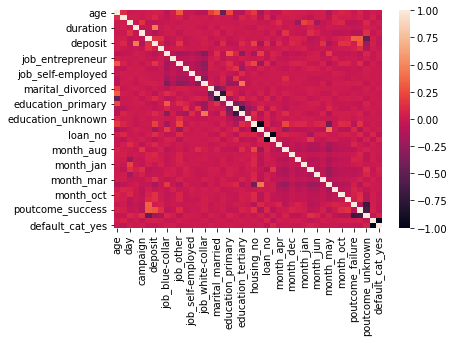

In [62]:
# Mostrar matriz de correlación de variables
# Pista: Explora las funciones corr de pandas y heatmap de seaborn

corr_matrix = sns.heatmap(bank_with_dummies.corr())

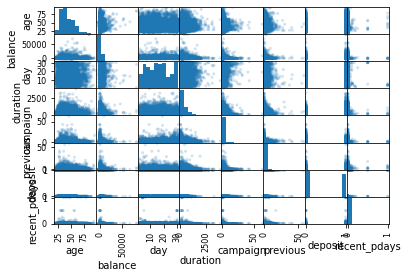

In [64]:
# Mostrar correlaciones como una función discreta entre las diferentes variables con una matriz
# útil para apreciar relaciones lineales

# Pista: explore pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(bank_data, alpha=0.2)
plt.show()

In [65]:
# Partir el test en cierta proporción (¡experimentar!) Importa la libreria sklearn y utiliza train test split ;)
y = bank_with_dummies['deposit']
X = bank_with_dummies.drop(['deposit'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
# Definir un clasificador

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

k = 5

neigh = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador con el dataset de train
neigh.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(neigh.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(neigh.score(X_test, y_test)))

pred = neigh.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.71
[[1423  494]
 [ 575 1192]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1917
           1       0.71      0.67      0.69      1767

    accuracy                           0.71      3684
   macro avg       0.71      0.71      0.71      3684
weighted avg       0.71      0.71      0.71      3684

